In [5]:
pairing_matrix_path = 'example-matrix.xlsx'
checkbox_random = True

In [6]:
import pandas as pd
from scipy.optimize import linear_sum_assignment

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Starting Matrix

In [70]:
df = pd.read_excel(pairing_matrix_path, index_col=0)
df

,San Diego,Swamp,Rose City,Mars,Oklahoma,Literal Hell,Diego Garcia
Donkey,2,1,4,6,3,5,7
Satan,6,5,4,3,2,1,7
Eren Jager,4,3,1,2,5,6,7
Doctor Long Bones,1,4,3,2,6,5,7
Baphomet,6,5,4,3,2,1,7
Shrek,4,1,2,5,3,6,7
Levy,3,4,1,2,5,6,7


# Shuffled Matrix

In [71]:
df = df.sample(n=len(df))
df

,San Diego,Swamp,Rose City,Mars,Oklahoma,Literal Hell,Diego Garcia
Satan,6,5,4,3,2,1,7
Donkey,2,1,4,6,3,5,7
Levy,3,4,1,2,5,6,7
Shrek,4,1,2,5,3,6,7
Doctor Long Bones,1,4,3,2,6,5,7
Eren Jager,4,3,1,2,5,6,7
Baphomet,6,5,4,3,2,1,7


# Assignments

In [72]:
df = df.sample(axis='columns', n=len(df)).sample(n=len(df))
row, col = linear_sum_assignment(df)

for i in range(len(row)):
    row_idx = row[i]
    col_idx = col[i]
    name = df.index[row_idx]
    location = df.columns[col_idx]
    print(f'{name} - {location}')

Baphomet - Literal Hell
Satan - Oklahoma
Donkey - Swamp
Doctor Long Bones - San Diego
Shrek - Diego Garcia
Eren Jager - Mars
Levy - Rose City


# Proof of fairness using simulation

These simulations provide proof that shuffling the matrix handles tie-breaks equitably by showing individuals with competing (1st choices) 

## Unshuffled matrices produce deterministic results

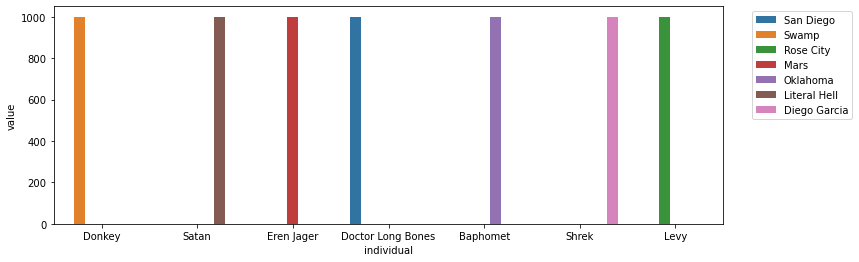

In [95]:
assignments = pd.DataFrame(0,  index=df.index, columns=df.columns, )
df = pd.read_excel(pairing_matrix_path, index_col=0)

for _ in range(1000):
    #df = df.sample(n=len(df))
    row, col = linear_sum_assignment(df)
    for i in range(len(row)):
        row_idx = row[i]
        col_idx = col[i]
        name = df.index[row_idx]
        location = df.columns[col_idx]
        assignments.loc[name, location] += 1
        
a = assignments.reset_index().melt(id_vars='index').rename({'index': 'individual'}, axis='columns')
plt.figure(figsize=(12, 4))
sns.barplot(data=a, x='individual', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.2, 1));

## Shuffling only rows provides equal chances

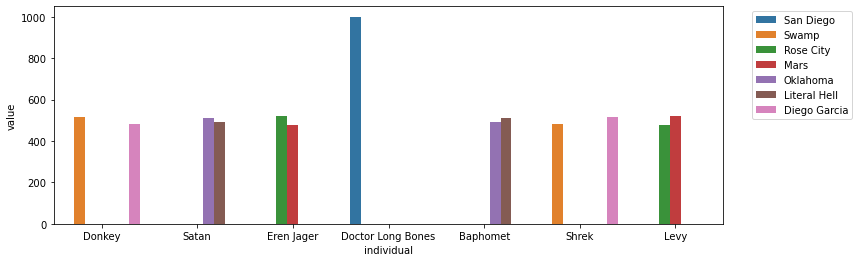

In [97]:
assignments = pd.DataFrame(0,  index=df.index, columns=df.columns, )
df = pd.read_excel(pairing_matrix_path, index_col=0)

for _ in range(1000):
    df = df.sample(n=len(df))
    row, col = linear_sum_assignment(df)
    for i in range(len(row)):
        row_idx = row[i]
        col_idx = col[i]
        name = df.index[row_idx]
        location = df.columns[col_idx]
        assignments.loc[name, location] += 1
        
a = assignments.reset_index().melt(id_vars='index').rename({'index': 'individual'}, axis='columns')
plt.figure(figsize=(12, 4))
sns.barplot(data=a, x='individual', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.2, 1));